<a href="https://colab.research.google.com/github/devdavinchi/5CS037/blob/main/2509455_devRai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1A: Single-Year HDI **Exploration**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [33]:
df = pd.read_csv('/content/drive/MyDrive/Human_Development_Index_Dataset.csv', encoding='latin1')

**PROBLEM 1A - TASK 1: Extract Latest Year**

In [34]:
#identifying new years
unique_years = sorted(df['year'].unique())
print("Unique years in dataset:")
print(unique_years)


Unique years in dataset:
[np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]


In [35]:
#filter for year 2022
hdi_2022_df = df[df['year'] == 2022].copy()
print(f"\nFiltered dataset for 2022: {len(hdi_2022_df)} rows")
print("\nDataframe saved as: hdi_2022_df")


Filtered dataset for 2022: 206 rows

Dataframe saved as: hdi_2022_df


**TASK 2: Data Exploration**

In [36]:
# Display first 10 rows
print("\nFirst 10 rows of 2022 dataset:")
print(hdi_2022_df.head(10))




First 10 rows of 2022 dataset:
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...      

In [37]:
# Count rows and columns
num_rows = hdi_2022_df.shape[0]
num_cols = hdi_2022_df.shape[1]
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Number of rows: 206
Number of columns: 30


In [38]:
# List all column names and data types
print("\nColumn names and their data types:")
for col, dtype in hdi_2022_df.dtypes.items():
    print(f"  {col}: {dtype}")


Column names and their data types:
  Unnamed: 0: int64
  iso3: object
  country: object
  year: int64
  hdi: float64
  life_expectancy: float64
  pop_millions: float64
  hdi_f: float64
  hdi_m: float64
  life_expec_f: float64
  life_expec_m: float64
  expec_yr_school: float64
  expec_yr_school_f: float64
  expec_yr_school_m: float64
  mean_yr_school: float64
  mean_yr_school_f: float64
  mean_yr_school_m: float64
  gross_inc_percap: float64
  gross_inc_percap_f: float64
  gross_inc_percap_m: float64
  gender_development: float64
  gender_inequality: float64
  secondary_education_f_%: float64
  secondary_education_m_%: float64
  seats_in_parliament_f_%: float64
  seats_in_parliament_m_%: float64
  labour_participation_f_%: float64
  labour_participation_m_%: float64
  co2_emission_tons: float64
  mat_footprint_percap_tons: float64


 **PROBLEM 1A - TASK 3: Missing Values & Data Cleaning**

In [39]:
# Check for missing values
print("\nMissing values in each column:")
missing_counts = hdi_2022_df.isnull().sum()
for col, count in missing_counts.items():
    if count > 0:
        print(f"  {col}: {count}")
print(f"\nTotal missing values: {missing_counts.sum()}")


Missing values in each column:
  hdi: 2
  hdi_f: 13
  hdi_m: 13
  expec_yr_school: 1
  expec_yr_school_f: 1
  expec_yr_school_m: 1
  mean_yr_school: 2
  mean_yr_school_f: 2
  mean_yr_school_m: 2
  gross_inc_percap: 2
  gross_inc_percap_f: 13
  gross_inc_percap_m: 13
  gender_development: 13
  gender_inequality: 29
  secondary_education_f_%: 17
  secondary_education_m_%: 17
  seats_in_parliament_f_%: 2
  seats_in_parliament_m_%: 2
  labour_participation_f_%: 12
  labour_participation_m_%: 12
  co2_emission_tons: 2
  mat_footprint_percap_tons: 41

Total missing values: 212


In [40]:
# Inspect for numeric columns stored as text
print("\nInspecting data types for numeric columns:")
potential_numeric = ['hdi', 'life_expectancy', 'expected_schooling',
                     'mean_schooling', 'gross_inc_percap']
for col in potential_numeric:
    if col in hdi_2022_df.columns:
        print(f"  {col}: {hdi_2022_df[col].dtype}")



Inspecting data types for numeric columns:
  hdi: float64
  life_expectancy: float64
  gross_inc_percap: float64


In [41]:
# Check for special characters representing missing data
print("\nChecking for special characters (–, ..):")
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == 'object':
        has_dash = (hdi_2022_df[col] == '–').sum()
        has_dots = (hdi_2022_df[col] == '..').sum()
        if has_dash > 0 or has_dots > 0:
            print(f"  {col}: {has_dash} dashes, {has_dots} double dots")


Checking for special characters (–, ..):


In [42]:
# Check for duplicates
duplicate_count = hdi_2022_df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")

# Check for inconsistent country names (sample check)
print("\nSample country names (checking consistency):")
print(hdi_2022_df['country'].head(15).tolist())


Duplicate rows: 0

Sample country names (checking consistency):
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados']


In [43]:


#Replace special characters with NaN
hdi_2022_df = hdi_2022_df.replace(['–', '..'], np.nan)
print(" Replaced special characters (–, ..) with NaN")

#Convert numeric columns to proper type
numeric_columns = ['hdi', 'life_expectancy', 'expected_schooling',
                   'mean_schooling', 'gross_inc_percap', 'gni_percap_minus_hdi_rank']
for col in numeric_columns:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')
print(" Converted numeric columns to proper data types")

#Remove duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()
print(" Removed duplicate rows")

#Handle missing values
# Justification: Dropping rows with missing HDI since HDI is our primary metric
initial_rows = len(hdi_2022_df)
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])
dropped_rows = initial_rows - len(hdi_2022_df)
print(f" Dropped {dropped_rows} rows with missing HDI values")
print("  Justification: HDI is the primary analysis metric")

print("\nMissing values after cleaning:")
print(hdi_2022_df.isnull().sum())


 Replaced special characters (–, ..) with NaN
 Converted numeric columns to proper data types
 Removed duplicate rows
 Dropped 2 rows with missing HDI values
  Justification: HDI is the primary analysis metric

Missing values after cleaning:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           0
life_expectancy               0
pop_millions                  0
hdi_f                        11
hdi_m                        11
life_expec_f                  0
life_expec_m                  0
expec_yr_school               0
expec_yr_school_f             0
expec_yr_school_m             0
mean_yr_school                0
mean_yr_school_f              0
mean_yr_school_m              0
gross_inc_percap              0
gross_inc_percap_f           11
gross_inc_percap_m           11
gender_development           11
gender_inequality            27
secondary_education_f_%      15
secondary_education_m_

**PROBLEM 1A - TASK 4: Basic Statistics**

In [44]:
# Compute mean, median, and standard deviation
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

print(f"\nHDI Statistics for 2022:")
print(f"  Mean: {hdi_mean:.4f}")
print(f"  Median: {hdi_median:.4f}")
print(f"  Standard Deviation: {hdi_std:.4f}")


HDI Statistics for 2022:
  Mean: 0.7229
  Median: 0.7395
  Standard Deviation: 0.1530


In [45]:
# Identify highest HDI country
max_idx = hdi_2022_df['hdi'].idxmax()
highest_country = hdi_2022_df.loc[max_idx, 'country']
highest_value = hdi_2022_df.loc[max_idx, 'hdi']
print(f"\nCountry with highest HDI:")
print(f"  {highest_country}: {highest_value:.4f}")



Country with highest HDI:
  Switzerland: 0.9670


In [46]:
# Identify lowest HDI country
min_idx = hdi_2022_df['hdi'].idxmin()
lowest_country = hdi_2022_df.loc[min_idx, 'country']
lowest_value = hdi_2022_df.loc[min_idx, 'hdi']
print(f"\nCountry with lowest HDI:")
print(f"  {lowest_country}: {lowest_value:.4f}")


Country with lowest HDI:
  Somalia: 0.3800


**PROBLEM 1A - TASK 5: Filtering and Sorting**

In [47]:
# Filter countries with HDI > 0.800
filtered_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()
print(f"\nCountries with HDI > 0.800: {len(filtered_df)}")

# Sort by GNI per Capita in descending order
sorted_df = filtered_df.sort_values('gross_inc_percap', ascending=False)

# Display top 10
print("\nTop 10 countries by GNI per Capita (among HDI > 0.800):")
top_10 = sorted_df[['country', 'hdi', 'gross_inc_percap']].head(10)
print(top_10.to_string(index=False))



Countries with HDI > 0.800: 71

Top 10 countries by GNI per Capita (among HDI > 0.800):
               country   hdi  gross_inc_percap
         Liechtenstein 0.942      146673.24150
                 Qatar 0.875       95944.37754
             Singapore 0.949       88761.14559
               Ireland 0.950       87467.51391
            Luxembourg 0.927       78554.23640
  United Arab Emirates 0.937       74103.71494
           Switzerland 0.967       69432.78669
                Norway 0.966       69189.76165
         United States 0.927       65564.93798
Hong Kong, China (SAR) 0.956       62485.50516


**PROBLEM 1A - TASK 6: Adding HDI Category Column**

In [48]:
# Create HDI Category function
def assign_hdi_category(hdi_val):
    if pd.isna(hdi_val):
        return np.nan
    elif hdi_val < 0.550:
        return 'Low'
    elif hdi_val < 0.700:
        return 'Medium'
    elif hdi_val < 0.800:
        return 'High'
    else:
        return 'Very High'

In [49]:
# Apply categorization
hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(assign_hdi_category)
print("HDI_Category column created")

# Verify classification
print("\nDistribution of HDI Categories:")
category_counts = hdi_2022_df['HDI_Category'].value_counts()
print(category_counts)

# Verify correctness with samples
print("\nVerification - Sample countries from each category:")
for category in ['Low', 'Medium', 'High', 'Very High']:
    sample_data = hdi_2022_df[hdi_2022_df['HDI_Category'] == category][['country', 'hdi', 'HDI_Category']].head(3)
    if not sample_data.empty:
        print(f"\n{category}:")
        print(sample_data.to_string(index=False))

# Save the final dataframe
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)
print("\n File saved as 'HDI_category_added.csv'")

HDI_Category column created

Distribution of HDI Categories:
HDI_Category
Very High    71
High         54
Medium       44
Low          35
Name: count, dtype: int64

Verification - Sample countries from each category:

Low:
     country   hdi HDI_Category
 Afghanistan 0.462          Low
       Benin 0.504          Low
Burkina Faso 0.438          Low

Medium:
   country   hdi HDI_Category
    Angola 0.591       Medium
Bangladesh 0.670       Medium
    Bhutan 0.681       Medium

High:
country   hdi HDI_Category
Albania 0.789         High
Algeria 0.745         High
Armenia 0.786         High

Very High:
            country   hdi HDI_Category
            Andorra 0.884    Very High
Antigua and Barbuda 0.826    Very High
          Argentina 0.849    Very High

 File saved as 'HDI_category_added.csv'


# Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)**bold text**

In [50]:
# Check and create region column if needed
if 'region' not in df.columns:
    print("Creating region column...")

    region_mapping = {
        # South Asia
        'Afghanistan': 'South Asia', 'Bangladesh': 'South Asia', 'Bhutan': 'South Asia',
        'India': 'South Asia', 'Maldives': 'South Asia', 'Nepal': 'South Asia',
        'Pakistan': 'South Asia', 'Sri Lanka': 'South Asia',

        # Middle East
        'Bahrain': 'Middle East', 'Iran': 'Middle East', 'Iraq': 'Middle East',
        'Israel': 'Middle East', 'Jordan': 'Middle East', 'Kuwait': 'Middle East',
        'Lebanon': 'Middle East', 'Oman': 'Middle East', 'Palestine': 'Middle East',
        'Qatar': 'Middle East', 'Saudi Arabia': 'Middle East', 'Syria': 'Middle East',
        'United Arab Emirates': 'Middle East', 'Yemen': 'Middle East',

        # East Asia & Pacific
        'China': 'East Asia & Pacific', 'Japan': 'East Asia & Pacific',
        'South Korea': 'East Asia & Pacific', 'Indonesia': 'East Asia & Pacific',
        'Malaysia': 'East Asia & Pacific', 'Philippines': 'East Asia & Pacific',
        'Thailand': 'East Asia & Pacific', 'Vietnam': 'East Asia & Pacific',
        'Singapore': 'East Asia & Pacific', 'Australia': 'East Asia & Pacific',
        'New Zealand': 'East Asia & Pacific', 'Myanmar': 'East Asia & Pacific',
        'Cambodia': 'East Asia & Pacific', 'Laos': 'East Asia & Pacific',

        # Europe & Central Asia
        'Germany': 'Europe & Central Asia', 'France': 'Europe & Central Asia',
        'United Kingdom': 'Europe & Central Asia', 'Italy': 'Europe & Central Asia',
        'Spain': 'Europe & Central Asia', 'Netherlands': 'Europe & Central Asia',
        'Switzerland': 'Europe & Central Asia', 'Sweden': 'Europe & Central Asia',
        'Norway': 'Europe & Central Asia', 'Denmark': 'Europe & Central Asia',
        'Finland': 'Europe & Central Asia', 'Poland': 'Europe & Central Asia',
        'Russia': 'Europe & Central Asia', 'Ukraine': 'Europe & Central Asia',
        'Belgium': 'Europe & Central Asia', 'Austria': 'Europe & Central Asia',
        'Greece': 'Europe & Central Asia', 'Portugal': 'Europe & Central Asia',
        'Czech Republic': 'Europe & Central Asia', 'Romania': 'Europe & Central Asia',
        'Hungary': 'Europe & Central Asia', 'Turkey': 'Europe & Central Asia',

        # North America
        'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',

        # Latin America & Caribbean
        'Brazil': 'Latin America & Caribbean', 'Argentina': 'Latin America & Caribbean',
        'Chile': 'Latin America & Caribbean', 'Colombia': 'Latin America & Caribbean',
        'Peru': 'Latin America & Caribbean', 'Venezuela': 'Latin America & Caribbean',
        'Ecuador': 'Latin America & Caribbean', 'Bolivia': 'Latin America & Caribbean',
        'Uruguay': 'Latin America & Caribbean', 'Paraguay': 'Latin America & Caribbean',
        'Costa Rica': 'Latin America & Caribbean', 'Panama': 'Latin America & Caribbean',
        'Cuba': 'Latin America & Caribbean', 'Jamaica': 'Latin America & Caribbean',

        # Sub-Saharan Africa
        'Nigeria': 'Sub-Saharan Africa', 'South Africa': 'Sub-Saharan Africa',
        'Kenya': 'Sub-Saharan Africa', 'Ethiopia': 'Sub-Saharan Africa',
        'Ghana': 'Sub-Saharan Africa', 'Tanzania': 'Sub-Saharan Africa',
        'Uganda': 'Sub-Saharan Africa', 'Senegal': 'Sub-Saharan Africa',
        'Rwanda': 'Sub-Saharan Africa', 'Mozambique': 'Sub-Saharan Africa',
        'Zimbabwe': 'Sub-Saharan Africa', 'Zambia': 'Sub-Saharan Africa',

        # North Africa
        'Egypt': 'North Africa', 'Morocco': 'North Africa', 'Algeria': 'North Africa',
        'Tunisia': 'North Africa', 'Libya': 'North Africa', 'Sudan': 'North Africa',
    }

    df['region'] = df['country'].map(region_mapping)
    df['region'] = df['region'].fillna('Other')
    print("✓ Region column created")
else:
    print("Region column already exists")

print(f"Regions found: {df['region'].nunique()}")

Creating region column...
✓ Region column created
Regions found: 9


In [51]:

# Filter for years 2020, 2021, and 2022
hdi_1b_df = df[df['year'].isin([2020, 2021, 2022])].copy()
print(f"Filtered dataset for years 2020-2022: {len(hdi_1b_df)} rows")

# Save the filtered dataset
hdi_1b_df.to_csv('HDI_problem1B.csv', index=False)
print("✓ Dataset saved as 'HDI_problem1B.csv'")

# Display year distribution
print("\nRecords per year:")
print(hdi_1b_df['year'].value_counts().sort_index())

Filtered dataset for years 2020-2022: 618 rows
✓ Dataset saved as 'HDI_problem1B.csv'

Records per year:
year
2020    206
2021    206
2022    206
Name: count, dtype: int64


**PROBLEM 1B - TASK 2: Data Cleaning**

In [52]:
# Check missing values in essential columns
essential_cols = ['hdi', 'country', 'year']
print("\nMissing values in essential columns:")
for col in essential_cols:
    missing = hdi_1b_df[col].isnull().sum()
    print(f"  {col}: {missing}")

# Check all missing values
print("\nMissing values in all columns:")
all_missing = hdi_1b_df.isnull().sum()
for col, count in all_missing.items():
    if count > 0:
        print(f"  {col}: {count}")

# Check for special characters
print("\nChecking for special characters (–, ..):")
for col in hdi_1b_df.columns:
    if hdi_1b_df[col].dtype == 'object':
        dash_count = (hdi_1b_df[col] == '–').sum()
        dots_count = (hdi_1b_df[col] == '..').sum()
        if dash_count > 0 or dots_count > 0:
            print(f"  {col}: {dash_count} dashes, {dots_count} dots")



Missing values in essential columns:
  hdi: 8
  country: 0
  year: 0

Missing values in all columns:
  hdi: 8
  hdi_f: 41
  hdi_m: 41
  expec_yr_school: 5
  expec_yr_school_f: 5
  expec_yr_school_m: 5
  mean_yr_school: 8
  mean_yr_school_f: 8
  mean_yr_school_m: 8
  gross_inc_percap: 6
  gross_inc_percap_f: 39
  gross_inc_percap_m: 39
  gender_development: 41
  gender_inequality: 89
  secondary_education_f_%: 53
  secondary_education_m_%: 53
  seats_in_parliament_f_%: 6
  seats_in_parliament_m_%: 6
  labour_participation_f_%: 36
  labour_participation_m_%: 36
  co2_emission_tons: 6
  mat_footprint_percap_tons: 123

Checking for special characters (–, ..):


In [53]:
# Check for duplicates
duplicates = hdi_1b_df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Check data types for numeric columns
print("\nData types of key numeric columns:")
numeric_cols = ['hdi', 'life_expectancy', 'expected_schooling',
                'mean_schooling', 'gross_inc_percap']
for col in numeric_cols:
    if col in hdi_1b_df.columns:
        print(f"  {col}: {hdi_1b_df[col].dtype}")

# Check country name consistency
print("\nSample country names:")
print(hdi_1b_df['country'].head(10).tolist())


Duplicate rows: 0

Data types of key numeric columns:
  hdi: float64
  life_expectancy: float64
  gross_inc_percap: float64

Sample country names:
['Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania', 'Algeria', 'Algeria', 'Algeria', 'Andorra']


In [54]:

# Step 1: Replace special characters with NaN
hdi_1b_df = hdi_1b_df.replace(['–', '..'], np.nan)
print(" Replaced special characters with NaN")
print("  Justification: These symbols represent unavailable data")

# Step 2: Convert numeric columns to proper types
for col in numeric_cols:
    if col in hdi_1b_df.columns:
        hdi_1b_df[col] = pd.to_numeric(hdi_1b_df[col], errors='coerce')
print(" Converted numeric columns to appropriate data types")
print("  Justification: Ensures proper numerical operations")

# Step 3: Remove duplicates
before_dup = len(hdi_1b_df)
hdi_1b_df = hdi_1b_df.drop_duplicates()
after_dup = len(hdi_1b_df)
print(f" Removed {before_dup - after_dup} duplicate rows")

# Step 4: Handle missing values in essential columns
before_clean = len(hdi_1b_df)
hdi_1b_df = hdi_1b_df.dropna(subset=['hdi', 'country', 'year'])
after_clean = len(hdi_1b_df)
print(f" Dropped {before_clean - after_clean} rows with missing essential data")
print("  Justification: HDI, country, and year are required for analysis")

# Step 5: Ensure consistent country naming (strip whitespace)
hdi_1b_df['country'] = hdi_1b_df['country'].str.strip()
print(" Standardized country names (removed extra whitespace)")

print("\nMissing values after cleaning:")
print(hdi_1b_df.isnull().sum())

# Save cleaned dataset
hdi_1b_df.to_csv('HDI_problem1B.csv', index=False)
print("\n Cleaned dataset saved as 'HDI_problem1B.csv'")

 Replaced special characters with NaN
  Justification: These symbols represent unavailable data
 Converted numeric columns to appropriate data types
  Justification: Ensures proper numerical operations
 Removed 0 duplicate rows
 Dropped 8 rows with missing essential data
  Justification: HDI, country, and year are required for analysis
 Standardized country names (removed extra whitespace)

Missing values after cleaning:
Unnamed: 0                     0
iso3                           0
country                        0
year                           0
hdi                            0
life_expectancy                0
pop_millions                   0
hdi_f                         33
hdi_m                         33
life_expec_f                   0
life_expec_m                   0
expec_yr_school                0
expec_yr_school_f              0
expec_yr_school_m              0
mean_yr_school                 0
mean_yr_school_f               0
mean_yr_school_m               0
gross_inc_perc

**PROBLEM 1B - TASK 3: Visualization Tasks**

A. Line Chart — HDI Trend (Country-Level):

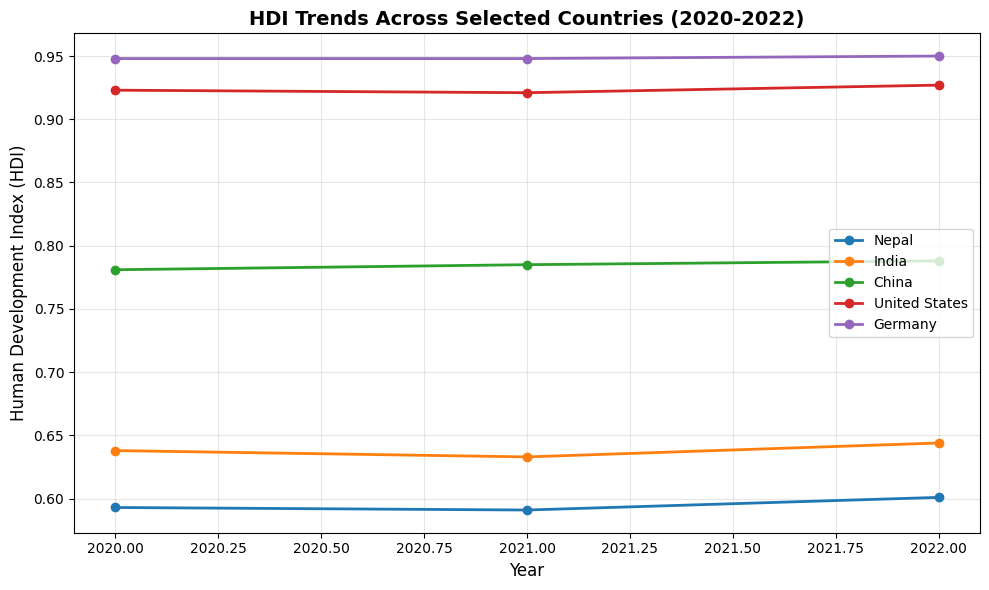

 Line chart created and saved as 'line_chart_hdi_trend.png'


In [55]:
# Select 5 countries (you can change these)
selected_countries = ['Nepal', 'India', 'China', 'United States', 'Germany']

# Filter data for selected countries
country_data = hdi_1b_df[hdi_1b_df['country'].isin(selected_countries)]

# Create line chart
plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_subset = country_data[country_data['country'] == country]
    plt.plot(country_subset['year'], country_subset['hdi'], marker='o', label=country, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.title('HDI Trends Across Selected Countries (2020-2022)', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('line_chart_hdi_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Line chart created and saved as 'line_chart_hdi_trend.png'")


*B. Generate Visualizations:*

*– Bar Chart: Average HDI by Region (2020–2022)*

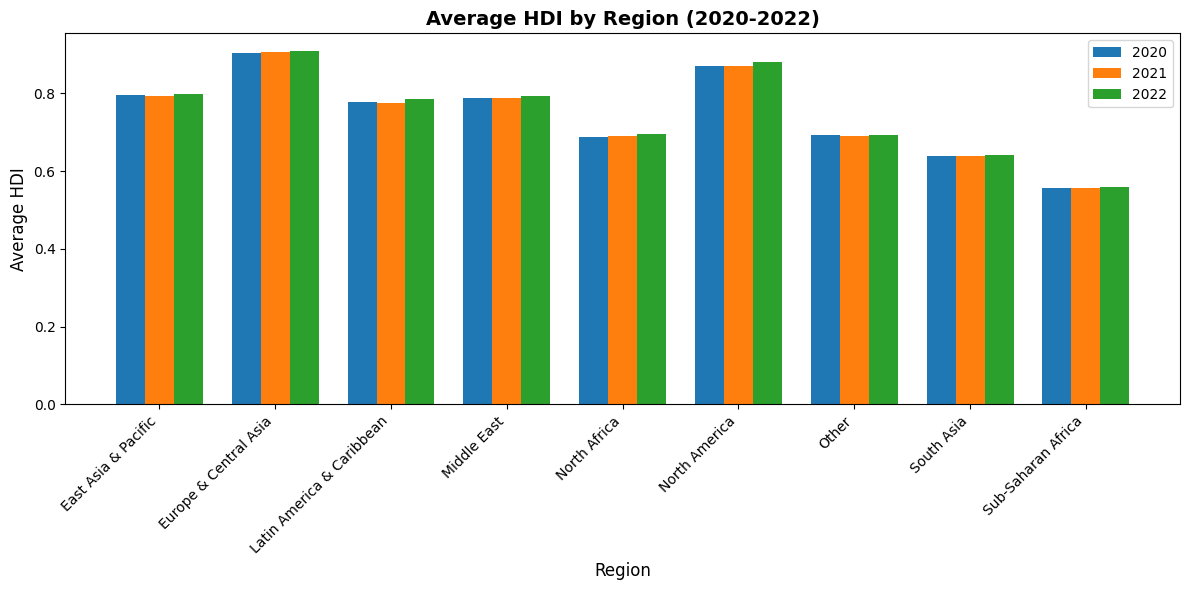

Bar chart created and saved as 'bar_chart_regional_hdi.png'


In [56]:
# Check if 'region' column exists
if 'region' in hdi_1b_df.columns:
    # Group by region and year, calculate mean HDI
    regional_avg = hdi_1b_df.groupby(['region', 'year'])['hdi'].mean().reset_index()

    # Create bar chart
    plt.figure(figsize=(12, 6))
    regions = regional_avg['region'].unique()
    years = [2020, 2021, 2022]
    x = np.arange(len(regions))
    width = 0.25

    for i, year in enumerate(years):
        year_data = regional_avg[regional_avg['year'] == year]
        values = [year_data[year_data['region'] == reg]['hdi'].values[0]
                  if len(year_data[year_data['region'] == reg]) > 0 else 0
                  for reg in regions]
        plt.bar(x + i*width, values, width, label=str(year))

    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Average HDI', fontsize=12)
    plt.title('Average HDI by Region (2020-2022)', fontsize=14, fontweight='bold')
    plt.xticks(x + width, regions, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.savefig('bar_chart_regional_hdi.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("Bar chart created and saved as 'bar_chart_regional_hdi.png'")
else:
    print(" 'region' column not found in dataset")

*– Box Plot: HDI Distribution for 2020, 2021, and 2022*

/tmp/ipython-input-3972314104.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=['2020', '2021', '2022'], patch_artist=True)


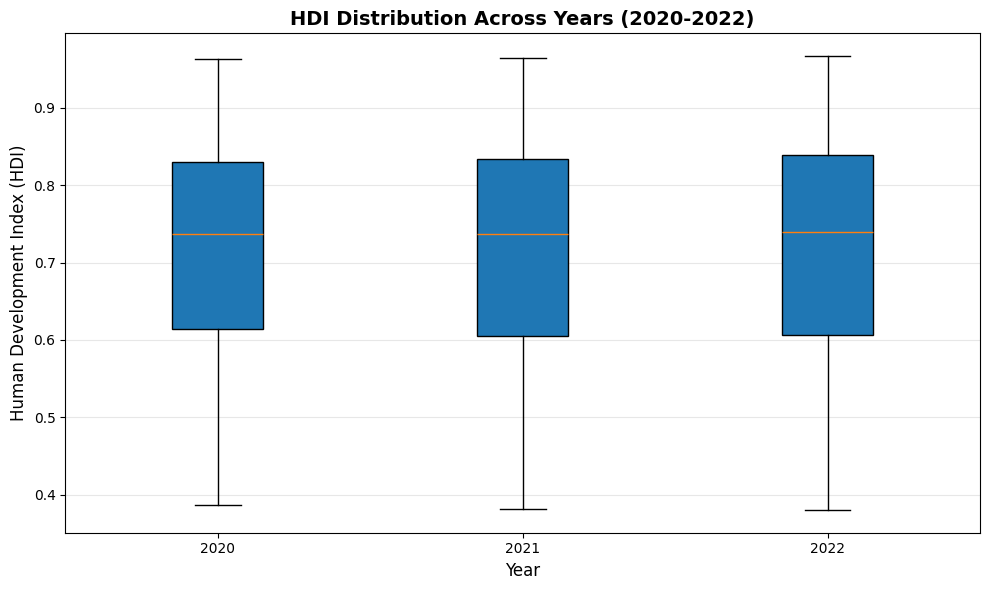

Box plot created and saved as 'box_plot_hdi_distribution.png'

Distribution observations:
  2020: Median=0.737, IQR=0.217
  2021: Median=0.737, IQR=0.229
  2022: Median=0.740, IQR=0.233


In [58]:
plt.figure(figsize=(10, 6))
data_for_box = [hdi_1b_df[hdi_1b_df['year'] == year]['hdi'].dropna() for year in [2020, 2021, 2022]]
plt.boxplot(data_for_box, labels=['2020', '2021', '2022'], patch_artist=True)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.title('HDI Distribution Across Years (2020-2022)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('box_plot_hdi_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Box plot created and saved as 'box_plot_hdi_distribution.png'")

# Brief comment on distribution
print("\nDistribution observations:")
for year in [2020, 2021, 2022]:
    year_data = hdi_1b_df[hdi_1b_df['year'] == year]['hdi']
    print(f"  {year}: Median={year_data.median():.3f}, IQR={year_data.quantile(0.75)-year_data.quantile(0.25):.3f}")

*– Scatter Plot: HDI vs. GNI per Capita*

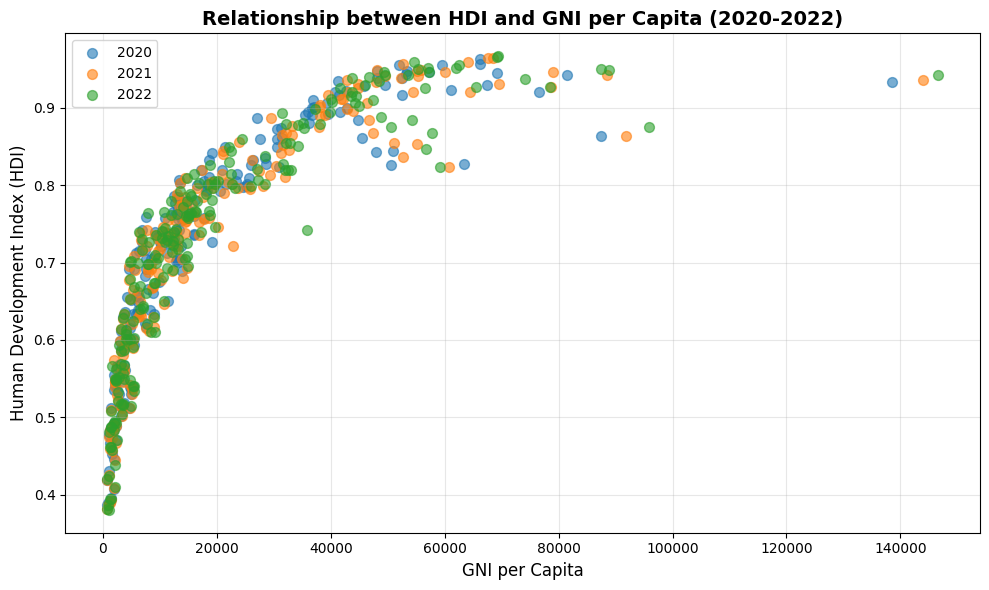

Scatter plot created and saved as 'scatter_plot_hdi_gni.png'


In [60]:
# Check if GNI per capita column exists
if 'gross_inc_percap' in hdi_1b_df.columns:
    # Create scatter plot
    plt.figure(figsize=(10, 6))

    for year in [2020, 2021, 2022]:
        year_subset = hdi_1b_df[hdi_1b_df['year'] == year].dropna(subset=['gross_inc_percap', 'hdi'])
        plt.scatter(year_subset['gross_inc_percap'], year_subset['hdi'],
                   label=str(year), alpha=0.6, s=50)

    plt.xlabel('GNI per Capita', fontsize=12)
    plt.ylabel('Human Development Index (HDI)', fontsize=12)
    plt.title('Relationship between HDI and GNI per Capita (2020-2022)', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('scatter_plot_hdi_gni.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("Scatter plot created and saved as 'scatter_plot_hdi_gni.png'")
else:
    print("GNI per Capita variable not available in the dataset.")

*4. Short Analysis Questions:*

In [62]:
# Question 1: Countries with greatest improvement
print("\nQ1: Countries with greatest improvement (2020 to 2022)")
print("-"*60)

# Get HDI for 2020 and 2022
hdi_2020 = hdi_1b_df[hdi_1b_df['year'] == 2020][['country', 'hdi']].rename(columns={'hdi': 'hdi_2020'})
hdi_2022 = hdi_1b_df[hdi_1b_df['year'] == 2022][['country', 'hdi']].rename(columns={'hdi': 'hdi_2022'})

# Merge and calculate change
hdi_change = pd.merge(hdi_2020, hdi_2022, on='country')
hdi_change['hdi_change'] = hdi_change['hdi_2022'] - hdi_change['hdi_2020']

# Top improvers
top_improvers = hdi_change.nlargest(10, 'hdi_change')[['country', 'hdi_2020', 'hdi_2022', 'hdi_change']]
print("\nTop 10 countries with greatest HDI improvement:")
print(top_improvers.to_string(index=False))



Q1: Countries with greatest improvement (2020 to 2022)
------------------------------------------------------------

Top 10 countries with greatest HDI improvement:
   country  hdi_2020  hdi_2022  hdi_change
   Andorra     0.843     0.884       0.041
Azerbaijan     0.722     0.760       0.038
   Ecuador     0.734     0.765       0.031
  Maldives     0.737     0.762       0.025
    Mexico     0.757     0.781       0.024
San Marino     0.844     0.867       0.023
Tajikistan     0.656     0.679       0.023
   Bahamas     0.798     0.820       0.022
    Kuwait     0.826     0.847       0.021
   Türkiye     0.835     0.855       0.020


In [63]:

# Question 2: Countries with decline
print("\n\nQ2: Countries with HDI decline")
print("-"*60)

decliners = hdi_change[hdi_change['hdi_change'] < 0].sort_values('hdi_change')
print(f"\nNumber of countries with HDI decline: {len(decliners)}")
if len(decliners) > 0:
    print("\nCountries with largest HDI decline:")
    print(decliners.head(10)[['country', 'hdi_2020', 'hdi_2022', 'hdi_change']].to_string(index=False))
    print("\nPossible reasons:")
    print("  - Economic disruptions from COVID-19 pandemic")
    print("  - Political instability or conflict")
    print("  - Natural disasters or climate events")
    print("  - Healthcare system strain")





Q2: Countries with HDI decline
------------------------------------------------------------

Number of countries with HDI decline: 54

Countries with largest HDI decline:
                         country  hdi_2020  hdi_2022  hdi_change
                     Timor-Leste     0.633     0.566      -0.067
                         Ukraine     0.762     0.734      -0.028
                     Afghanistan     0.488     0.462      -0.026
                         Namibia     0.634     0.610      -0.024
                         Lebanon     0.742     0.723      -0.019
Saint Vincent and the Grenadines     0.785     0.772      -0.013
                        Suriname     0.702     0.690      -0.012
           Eswatini (Kingdom of)     0.622     0.610      -0.012
                           Gabon     0.704     0.693      -0.011
                        Paraguay     0.742     0.731      -0.011

Possible reasons:
  - Economic disruptions from COVID-19 pandemic
  - Political instability or conflict
  - Nat

In [64]:
# Question 3: Regional averages
print("\n\nQ3: Regional HDI averages (2020-2022)")
print("-"*60)

if 'region' in hdi_1b_df.columns:
    regional_summary = hdi_1b_df.groupby('region')['hdi'].agg(['mean', 'std', 'min', 'max']).round(4)
    regional_summary = regional_summary.sort_values('mean', ascending=False)
    print("\nRegional HDI statistics:")
    print(regional_summary)

    print(f"\nHighest average HDI region: {regional_summary.index[0]}")
    print(f"Lowest average HDI region: {regional_summary.index[-1]}")
else:
    print("Region column not available for analysis")





Q3: Regional HDI averages (2020-2022)
------------------------------------------------------------

Regional HDI statistics:
                             mean     std    min    max
region                                                 
Europe & Central Asia      0.9057  0.0534  0.734  0.967
North America              0.8737  0.0819  0.757  0.935
East Asia & Pacific        0.7957  0.1268  0.596  0.949
Middle East                0.7889  0.1413  0.424  0.937
Latin America & Caribbean  0.7797  0.0459  0.704  0.860
Other                      0.6919  0.1465  0.380  0.959
North Africa               0.6912  0.0824  0.516  0.746
South Asia                 0.6396  0.0983  0.462  0.783
Sub-Saharan Africa         0.5578  0.0659  0.459  0.722

Highest average HDI region: Europe & Central Asia
Lowest average HDI region: Sub-Saharan Africa


In [65]:
# Question 4: COVID-19 impact discussion
print("\n\nQ4: COVID-19 pandemic impact on HDI trends")
print("-"*60)
print("""
Key observations on pandemic impact:
- Years 2020-2022 encompass the acute pandemic period
- Expected impacts on HDI components:
  * Health: Reduced life expectancy due to COVID deaths and healthcare disruption
  * Education: School closures affecting expected years of schooling
  * Income: Economic contractions reducing GNI per capita
- Recovery patterns may vary by region based on:
  * Vaccination rates and healthcare capacity
  * Economic resilience and fiscal support
  * Digital infrastructure for remote work/education
""")



Q4: COVID-19 pandemic impact on HDI trends
------------------------------------------------------------

Key observations on pandemic impact:
- Years 2020-2022 encompass the acute pandemic period
- Expected impacts on HDI components:
  * Health: Reduced life expectancy due to COVID deaths and healthcare disruption
  * Education: School closures affecting expected years of schooling
  * Income: Economic contractions reducing GNI per capita
- Recovery patterns may vary by region based on:
  * Vaccination rates and healthcare capacity
  * Economic resilience and fiscal support
  * Digital infrastructure for remote work/education



# **PROBLEM 2**





**- TASK 1: Create South Asia Subset**

In [66]:

# Define South Asian countries
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

print("South Asian countries:")
for country in south_asia_countries:
    print(f"  - {country}")

# Filter dataset for South Asia
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()
print(f"\nTotal rows in South Asia subset: {len(south_asia_df)}")
print(f"Years covered: {south_asia_df['year'].min()} to {south_asia_df['year'].max()}")

# Save the dataset
south_asia_df.to_csv('HDI_SouthAsia.csv', index=False)
print("✓ Dataset saved as 'HDI_SouthAsia.csv'")

# Display summary
print("\nRecords per country:")
print(south_asia_df['country'].value_counts())


South Asian countries:
  - Afghanistan
  - Bangladesh
  - Bhutan
  - India
  - Maldives
  - Nepal
  - Pakistan
  - Sri Lanka

Total rows in South Asia subset: 264
Years covered: 1990 to 2022
✓ Dataset saved as 'HDI_SouthAsia.csv'

Records per country:
country
Afghanistan    33
Bangladesh     33
Bhutan         33
India          33
Maldives       33
Nepal          33
Pakistan       33
Sri Lanka      33
Name: count, dtype: int64


**2. Composite Development Score:**

Using data from year: 2022

Checking required columns:
  life_expectancy available: True
  gross_inc_percap available: True

Composite Score calculation complete

South Asian countries ranked by Composite Score:
    country  Composite_Score   hdi  Composite_Rank
   Maldives         0.600000 0.762               1
  Sri Lanka         0.410342 0.780               2
     Bhutan         0.315326 0.681               3
 Bangladesh         0.269390 0.670               4
      India         0.177463 0.644               5
      Nepal         0.173122 0.601               6
   Pakistan         0.128527 0.540               7
Afghanistan         0.000000 0.462               8


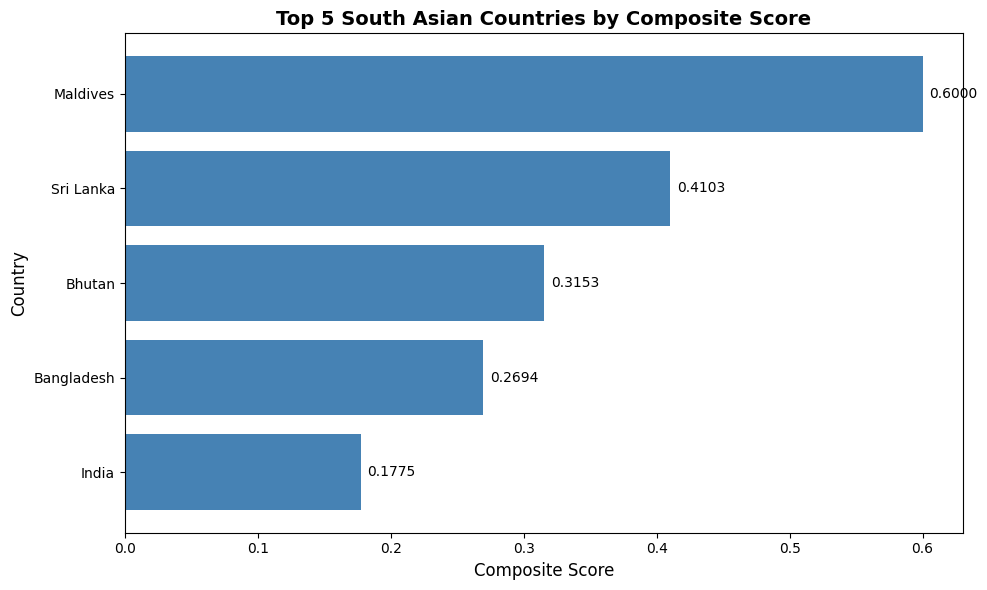

 Horizontal bar chart saved as 'composite_score_top5.png'

Comparison: Composite Score Rank vs HDI Rank:
    country  Composite_Rank  HDI_Rank  Rank_Difference
   Maldives               1         2                1
  Sri Lanka               2         1               -1
     Bhutan               3         3                0
 Bangladesh               4         4                0
      India               5         5                0
      Nepal               6         6                0
   Pakistan               7         7                0
Afghanistan               8         8                0

Discussion:
Differences in ranking suggest that life expectancy and income
alone don't perfectly predict HDI, which also includes education metrics.


In [68]:
 #Filter for latest year with complete data
latest_year = south_asia_df['year'].max()
sa_latest = south_asia_df[south_asia_df['year'] == latest_year].copy()

print(f"Using data from year: {latest_year}")

# Check for required columns
print("\nChecking required columns:")
print(f"  life_expectancy available: {'life_expectancy' in sa_latest.columns}")
print(f"  gross_inc_percap available: {'gross_inc_percap' in sa_latest.columns}")

# Create Composite Score
# Formula: 0.30 × Life Expectancy + 0.30 × GNI per Capita
# Note: Need to normalize these metrics first

# Normalize life expectancy (0-1 scale)
le_min = sa_latest['life_expectancy'].min()
le_max = sa_latest['life_expectancy'].max()
sa_latest['life_exp_index'] = (sa_latest['life_expectancy'] - le_min) / (le_max - le_min)

# Normalize GNI per capita (0-1 scale)
gni_min = sa_latest['gross_inc_percap'].min()
gni_max = sa_latest['gross_inc_percap'].max()
sa_latest['gni_index'] = (sa_latest['gross_inc_percap'] - gni_min) / (gni_max - gni_min)

# Calculate Composite Score
sa_latest['Composite_Score'] = (0.30 * sa_latest['life_exp_index']) + (0.30 * sa_latest['gni_index'])

print("\nComposite Score calculation complete")

# Rank countries by Composite Score
sa_ranked = sa_latest[['country', 'Composite_Score', 'hdi']].sort_values('Composite_Score', ascending=False)
sa_ranked['Composite_Rank'] = range(1, len(sa_ranked) + 1)

print("\nSouth Asian countries ranked by Composite Score:")
print(sa_ranked.to_string(index=False))

# Plot top 5 countries in horizontal bar chart
top_5 = sa_ranked.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5['country'], top_5['Composite_Score'], color='steelblue')
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_5['Composite_Score']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.savefig('composite_score_top5.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Horizontal bar chart saved as 'composite_score_top5.png'")

# Compare with HDI ranking
sa_ranked_hdi = sa_latest[['country', 'hdi']].sort_values('hdi', ascending=False)
sa_ranked_hdi['HDI_Rank'] = range(1, len(sa_ranked_hdi) + 1)

comparison = pd.merge(sa_ranked[['country', 'Composite_Rank']],
                     sa_ranked_hdi[['country', 'HDI_Rank']],
                     on='country')
comparison['Rank_Difference'] = comparison['HDI_Rank'] - comparison['Composite_Rank']

print("\nComparison: Composite Score Rank vs HDI Rank:")
print(comparison.to_string(index=False))
print("\nDiscussion:")
print("Differences in ranking suggest that life expectancy and income")
print("alone don't perfectly predict HDI, which also includes education metrics.")

**3. Outlier Detection:**

Analyzing 8 countries from 2022

HDI Outlier Detection (1.5 × IQR rule):
  Q1: 0.5857
  Q3: 0.7013
  IQR: 0.1155
  Lower bound: 0.4125
  Upper bound: 0.8745

HDI outliers found: 0

GNI per Capita Outlier Detection (1.5 × IQR rule):
  Q1: 5037.09
  Q3: 10943.53
  IQR: 5906.44
  Lower bound: -3822.57
  Upper bound: 19803.19

GNI per Capita outliers found: 0


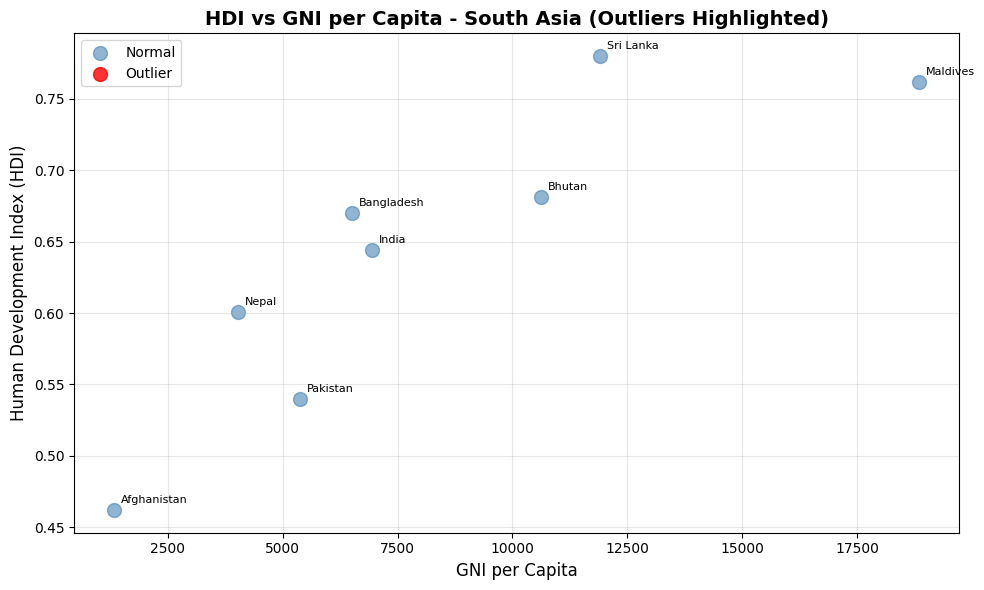


 Scatter plot saved as 'outlier_detection_scatter.png'

Discussion of outliers:


In [70]:
# Use latest year data
sa_outlier = south_asia_df[south_asia_df['year'] == latest_year].copy()

# Remove any rows with missing HDI or GNI
sa_outlier = sa_outlier.dropna(subset=['hdi', 'gross_inc_percap'])

print(f"Analyzing {len(sa_outlier)} countries from {latest_year}")

# Detect outliers using 1.5 × IQR rule for HDI
q1_hdi = sa_outlier['hdi'].quantile(0.25)
q3_hdi = sa_outlier['hdi'].quantile(0.75)
iqr_hdi = q3_hdi - q1_hdi
lower_hdi = q1_hdi - 1.5 * iqr_hdi
upper_hdi = q3_hdi + 1.5 * iqr_hdi

print(f"\nHDI Outlier Detection (1.5 × IQR rule):")
print(f"  Q1: {q1_hdi:.4f}")
print(f"  Q3: {q3_hdi:.4f}")
print(f"  IQR: {iqr_hdi:.4f}")
print(f"  Lower bound: {lower_hdi:.4f}")
print(f"  Upper bound: {upper_hdi:.4f}")

hdi_outliers = sa_outlier[(sa_outlier['hdi'] < lower_hdi) | (sa_outlier['hdi'] > upper_hdi)]
print(f"\nHDI outliers found: {len(hdi_outliers)}")
if len(hdi_outliers) > 0:
    print(hdi_outliers[['country', 'hdi']].to_string(index=False))

# Detect outliers using 1.5 × IQR rule for GNI per Capita
q1_gni = sa_outlier['gross_inc_percap'].quantile(0.25)
q3_gni = sa_outlier['gross_inc_percap'].quantile(0.75)
iqr_gni = q3_gni - q1_gni
lower_gni = q1_gni - 1.5 * iqr_gni
upper_gni = q3_gni + 1.5 * iqr_gni

print(f"\nGNI per Capita Outlier Detection (1.5 × IQR rule):")
print(f"  Q1: {q1_gni:.2f}")
print(f"  Q3: {q3_gni:.2f}")
print(f"  IQR: {iqr_gni:.2f}")
print(f"  Lower bound: {lower_gni:.2f}")
print(f"  Upper bound: {upper_gni:.2f}")

gni_outliers = sa_outlier[(sa_outlier['gross_inc_percap'] < lower_gni) | (sa_outlier['gross_inc_percap'] > upper_gni)]
print(f"\nGNI per Capita outliers found: {len(gni_outliers)}")
if len(gni_outliers) > 0:
    print(gni_outliers[['country', 'gross_inc_percap']].to_string(index=False))

# Mark outliers in dataframe
sa_outlier['is_outlier'] = False
outlier_countries = set(hdi_outliers['country'].tolist() + gni_outliers['country'].tolist())
sa_outlier.loc[sa_outlier['country'].isin(outlier_countries), 'is_outlier'] = True

# Create scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))
normal = sa_outlier[~sa_outlier['is_outlier']]
outlier = sa_outlier[sa_outlier['is_outlier']]

plt.scatter(normal['gross_inc_percap'], normal['hdi'],
           color='steelblue', s=100, alpha=0.6, label='Normal')
plt.scatter(outlier['gross_inc_percap'], outlier['hdi'],
           color='red', s=100, alpha=0.8, label='Outlier')

# Annotate countries
for idx, row in sa_outlier.iterrows():
    plt.annotate(row['country'], (row['gross_inc_percap'], row['hdi']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('GNI per Capita', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.title('HDI vs GNI per Capita - South Asia (Outliers Highlighted)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outlier_detection_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Scatter plot saved as 'outlier_detection_scatter.png'")

print("\nDiscussion of outliers:")
for country in outlier_countries:
    country_data = sa_outlier[sa_outlier['country'] == country].iloc[0]
    print(f"\n{country}:")
    print(f"  HDI: {country_data['hdi']:.4f}, GNI per capita: {country_data['gross_inc_percap']:.2f}")
    print(f"  Possible reasons: Unique economic structure, resource wealth, or development challenges")

**4. Exploring Metric Relationships:**

Analyzing relationships using 221 observations

Pearson Correlation with HDI:
  Gender Development Index: 0.8656
  Life Expectancy Index: 0.9488

Strongest relationship: Life Expectancy Index (r = 0.9488)
Weakest relationship: Gender Development Index (r = 0.8656)


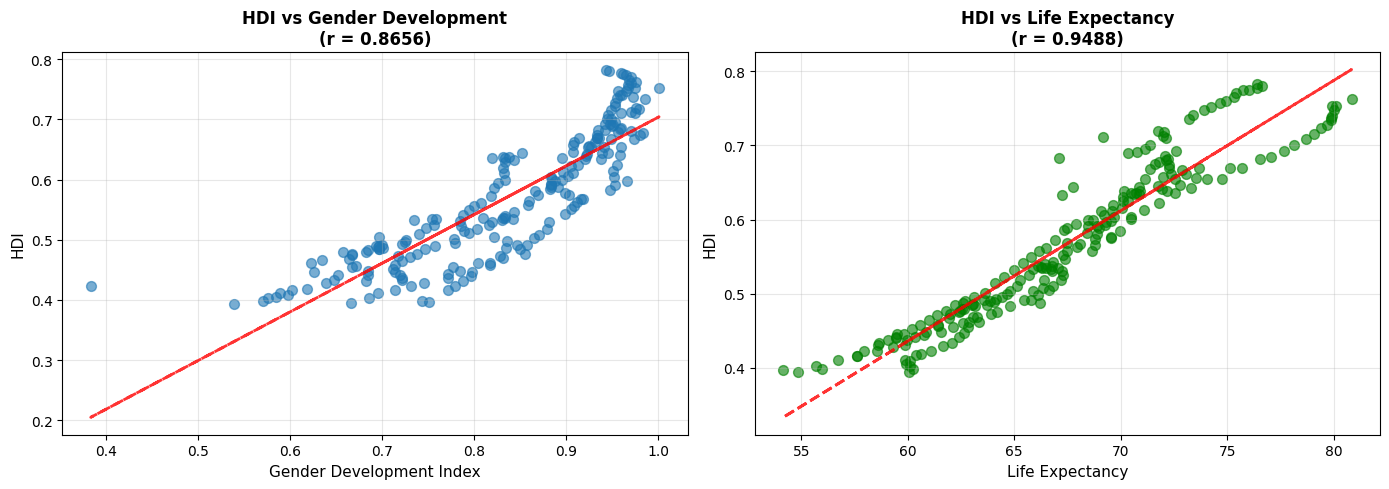


 Scatter plots saved as 'metric_relationships_scatter.png'

Discussion:
The metric with stronger correlation (r closer to ±1) shows
a more predictable relationship with HDI. Both metrics contribute
to overall human development but with varying degrees of influence.


In [71]:

# Use all South Asia data (multiple years for better correlation)
sa_metrics = south_asia_df.dropna(subset=['hdi', 'gender_development', 'life_expectancy']).copy()

print(f"Analyzing relationships using {len(sa_metrics)} observations")

# Compute Pearson correlation with HDI
metric1 = 'gender_development'
metric2 = 'life_expectancy'

corr1 = sa_metrics[['hdi', metric1]].corr().iloc[0, 1]
corr2 = sa_metrics[['hdi', metric2]].corr().iloc[0, 1]

print(f"\nPearson Correlation with HDI:")
print(f"  Gender Development Index: {corr1:.4f}")
print(f"  Life Expectancy Index: {corr2:.4f}")

# Determine strongest and weakest
if abs(corr1) > abs(corr2):
    print(f"\nStrongest relationship: Gender Development Index (r = {corr1:.4f})")
    print(f"Weakest relationship: Life Expectancy Index (r = {corr2:.4f})")
else:
    print(f"\nStrongest relationship: Life Expectancy Index (r = {corr2:.4f})")
    print(f"Weakest relationship: Gender Development Index (r = {corr1:.4f})")

# Create scatter plots with trendlines
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Gender Development vs HDI
axes[0].scatter(sa_metrics[metric1], sa_metrics['hdi'], alpha=0.6, s=50)
z1 = np.polyfit(sa_metrics[metric1].dropna(),
                sa_metrics.loc[sa_metrics[metric1].notna(), 'hdi'], 1)
p1 = np.poly1d(z1)
axes[0].plot(sa_metrics[metric1], p1(sa_metrics[metric1]), "r--", alpha=0.8, linewidth=2)
axes[0].set_xlabel('Gender Development Index', fontsize=11)
axes[0].set_ylabel('HDI', fontsize=11)
axes[0].set_title(f'HDI vs Gender Development\n(r = {corr1:.4f})', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Life Expectancy vs HDI
axes[1].scatter(sa_metrics[metric2], sa_metrics['hdi'], alpha=0.6, s=50, color='green')
z2 = np.polyfit(sa_metrics[metric2].dropna(),
                sa_metrics.loc[sa_metrics[metric2].notna(), 'hdi'], 1)
p2 = np.poly1d(z2)
axes[1].plot(sa_metrics[metric2], p2(sa_metrics[metric2]), "r--", alpha=0.8, linewidth=2)
axes[1].set_xlabel('Life Expectancy', fontsize=11)
axes[1].set_ylabel('HDI', fontsize=11)
axes[1].set_title(f'HDI vs Life Expectancy\n(r = {corr2:.4f})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('metric_relationships_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Scatter plots saved as 'metric_relationships_scatter.png'")

print("\nDiscussion:")
print(f"The metric with stronger correlation (r closer to ±1) shows")
print(f"a more predictable relationship with HDI. Both metrics contribute")
print(f"to overall human development but with varying degrees of influence.")


**5. Gap Analysis:**

Analyzing gap for 8 countries in 2022

GNI-HDI Gap Formula: (Normalized GNI per capita) - HDI
Positive gap: Income higher than expected given HDI
Negative gap: HDI higher than expected given income

Countries ranked by GNI-HDI Gap (Descending):
    country  gross_inc_percap   hdi  GNI_HDI_Gap
   Maldives      18846.792190 0.762     0.238000
     Bhutan      10624.873880 0.681    -0.150513
  Sri Lanka      11899.498470 0.780    -0.176726
   Pakistan       5374.270423 0.540    -0.309349
      India       6950.526798 0.644    -0.323337
 Bangladesh       6511.122178 0.670    -0.374429
      Nepal       4025.554685 0.601    -0.447367
Afghanistan       1335.205733 0.462    -0.462000

Top 3 Positive Gaps:
  country  gross_inc_percap   hdi  GNI_HDI_Gap
 Maldives       18846.79219 0.762     0.238000
   Bhutan       10624.87388 0.681    -0.150513
Sri Lanka       11899.49847 0.780    -0.176726

Top 3 Negative Gaps:
    country  gross_inc_percap   hdi  GNI_HDI_Gap
Afghanistan       1335.205733 0.4

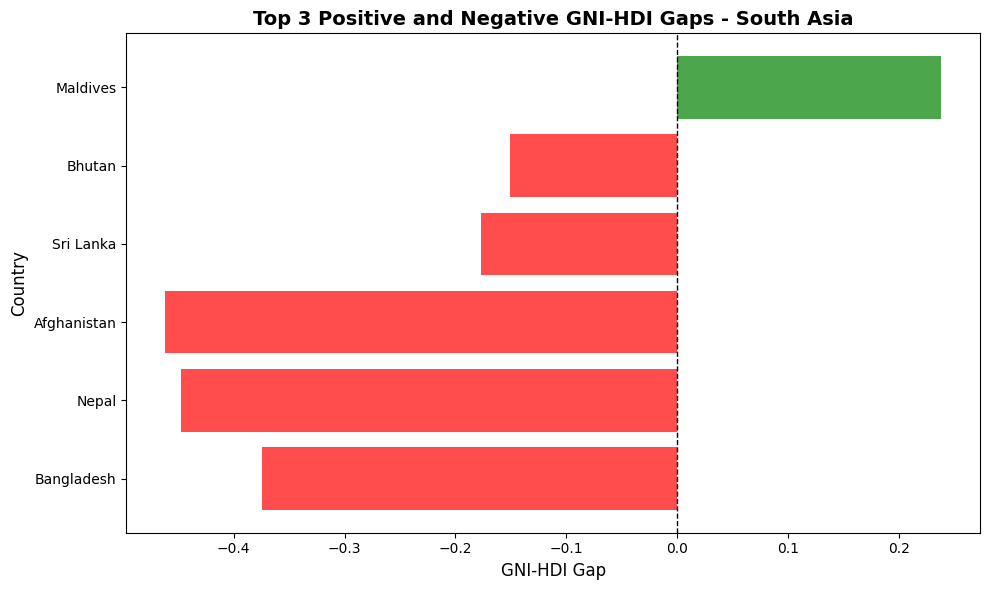


 Gap analysis chart saved as 'gap_analysis_chart.png'

Implications of Gap Analysis:

Positive Gap (High GNI, Lower HDI):
  - Wealth not translating to health/education improvements
  - Possible inequality in resource distribution
  - Investment needed in social services

Negative Gap (Lower GNI, Higher HDI):
  - Efficient use of limited resources
  - Strong public services despite economic constraints
  - Social investments prioritized over pure economic growth


In [72]:

# Use latest year data
sa_gap = south_asia_df[south_asia_df['year'] == latest_year].copy()
sa_gap = sa_gap.dropna(subset=['gross_inc_percap', 'hdi'])

print(f"Analyzing gap for {len(sa_gap)} countries in {latest_year}")

# Create GNI_HDI_Gap metric
# First normalize both metrics to same scale for meaningful comparison
gni_norm = (sa_gap['gross_inc_percap'] - sa_gap['gross_inc_percap'].min()) / (sa_gap['gross_inc_percap'].max() - sa_gap['gross_inc_percap'].min())
hdi_norm = sa_gap['hdi']  # Already 0-1 scale

sa_gap['GNI_HDI_Gap'] = gni_norm - hdi_norm

print("\nGNI-HDI Gap Formula: (Normalized GNI per capita) - HDI")
print("Positive gap: Income higher than expected given HDI")
print("Negative gap: HDI higher than expected given income")

# Rank by gap
sa_gap_sorted = sa_gap[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']].sort_values('GNI_HDI_Gap', ascending=False)
print("\nCountries ranked by GNI-HDI Gap (Descending):")
print(sa_gap_sorted.to_string(index=False))

# Top 3 positive gaps
top_3_positive = sa_gap_sorted.head(3)
print("\nTop 3 Positive Gaps:")
print(top_3_positive.to_string(index=False))

# Top 3 negative gaps
top_3_negative = sa_gap_sorted.tail(3).sort_values('GNI_HDI_Gap')
print("\nTop 3 Negative Gaps:")
print(top_3_negative.to_string(index=False))

# Plot top 3 positive and negative gaps
plot_data = pd.concat([top_3_positive, top_3_negative])

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in plot_data['GNI_HDI_Gap']]
plt.barh(plot_data['country'], plot_data['GNI_HDI_Gap'], color=colors, alpha=0.7)
plt.xlabel('GNI-HDI Gap', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 3 Positive and Negative GNI-HDI Gaps - South Asia', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('gap_analysis_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Gap analysis chart saved as 'gap_analysis_chart.png'")

print("\nImplications of Gap Analysis:")
print("\nPositive Gap (High GNI, Lower HDI):")
print("  - Wealth not translating to health/education improvements")
print("  - Possible inequality in resource distribution")
print("  - Investment needed in social services")
print("\nNegative Gap (Lower GNI, Higher HDI):")
print("  - Efficient use of limited resources")
print("  - Strong public services despite economic constraints")
print("  - Social investments prioritized over pure economic growth")


# **Problem 3**

# Comparative Regional Analysis: South Asia vs Middle East

*1. Create Middle East Subset:*

In [73]:
# Define Middle East countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Define South Asia countries
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Create subsets
middle_east_df = hdi_1b_df[hdi_1b_df['country'].isin(middle_east_countries)].copy()
south_asia_df = hdi_1b_df[hdi_1b_df['country'].isin(south_asia_countries)].copy()

print(f"Middle East subset: {len(middle_east_df)} rows")
print(f"South Asia subset: {len(south_asia_df)} rows")

# Save datasets
middle_east_df.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)
south_asia_df.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)

print(" Files saved")

Middle East subset: 33 rows
South Asia subset: 24 rows
 Files saved


*2. Descriptive Statistics:*

In [74]:
# Calculate mean and std for each region
sa_stats = south_asia_df.groupby('year')['hdi'].agg(['mean', 'std']).round(4)
me_stats = middle_east_df.groupby('year')['hdi'].agg(['mean', 'std']).round(4)

print("\nSouth Asia HDI Statistics (2020-2022):")
print(sa_stats)
print(f"Overall Mean: {south_asia_df['hdi'].mean():.4f}")

print("\nMiddle East HDI Statistics (2020-2022):")
print(me_stats)
print(f"Overall Mean: {middle_east_df['hdi'].mean():.4f}")

# Determine better performing region
if middle_east_df['hdi'].mean() > south_asia_df['hdi'].mean():
    print(f"\nMiddle East performs better on average (HDI: {middle_east_df['hdi'].mean():.4f})")
else:
    print(f"\nSouth Asia performs better on average (HDI: {south_asia_df['hdi'].mean():.4f})")


South Asia HDI Statistics (2020-2022):
        mean     std
year                
2020  0.6376  0.0969
2021  0.6386  0.1042
2022  0.6425  0.1071
Overall Mean: 0.6396

Middle East HDI Statistics (2020-2022):
        mean     std
year                
2020  0.7878  0.1434
2021  0.7869  0.1458
2022  0.7920  0.1485
Overall Mean: 0.7889

Middle East performs better on average (HDI: 0.7889)


*3. Top and Bottom Performers:*


South Asia - Top 3:
country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

South Asia - Bottom 3:
country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64

Middle East - Top 3:
country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Middle East - Bottom 3:
country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi, dtype: float64


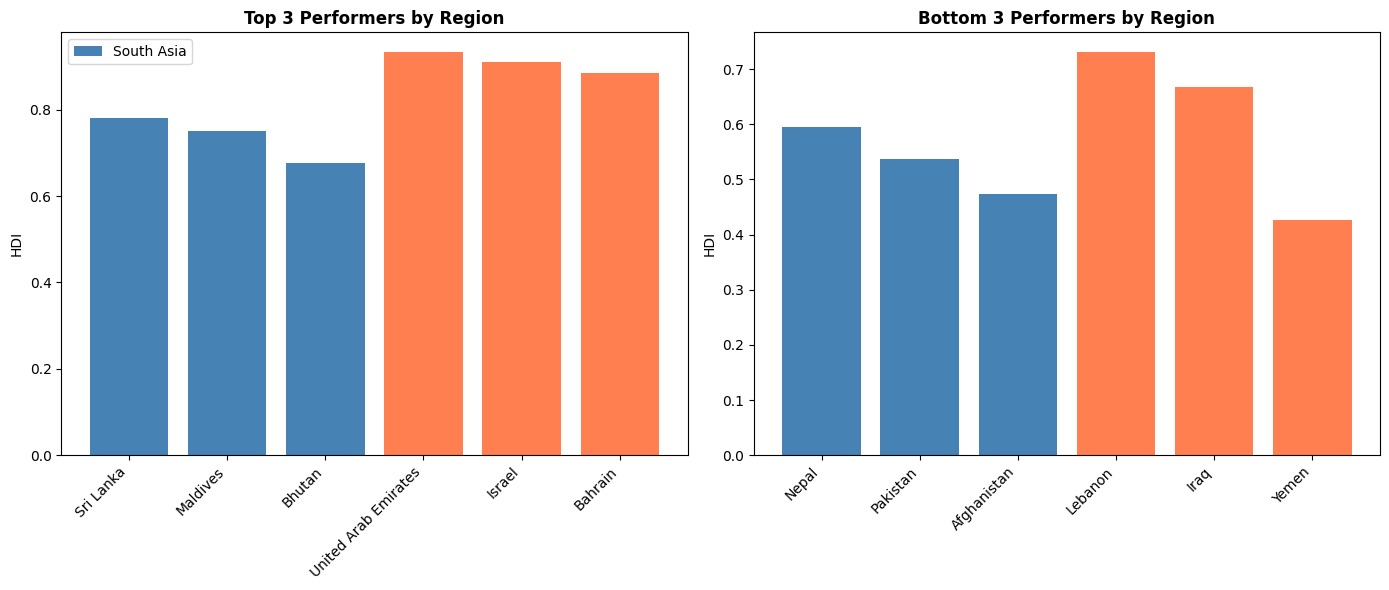

 Chart saved as 'top_bottom_performers.png'


In [75]:

# Get latest year average HDI per country
sa_avg = south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
me_avg = middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False)

print("\nSouth Asia - Top 3:")
print(sa_avg.head(3))
print("\nSouth Asia - Bottom 3:")
print(sa_avg.tail(3))

print("\nMiddle East - Top 3:")
print(me_avg.head(3))
print("\nMiddle East - Bottom 3:")
print(me_avg.tail(3))

# Prepare data for bar chart
top_sa = sa_avg.head(3)
bottom_sa = sa_avg.tail(3)
top_me = me_avg.head(3)
bottom_me = me_avg.tail(3)

# Create comparison bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top performers
top_countries = list(top_sa.index) + list(top_me.index)
top_values = list(top_sa.values) + list(top_me.values)
top_regions = ['South Asia']*3 + ['Middle East']*3

top_df = pd.DataFrame({'Country': top_countries, 'HDI': top_values, 'Region': top_regions})
x_pos = np.arange(len(top_countries))
colors_top = ['steelblue' if r == 'South Asia' else 'coral' for r in top_regions]
axes[0].bar(x_pos, top_values, color=colors_top)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(top_countries, rotation=45, ha='right')
axes[0].set_ylabel('HDI')
axes[0].set_title('Top 3 Performers by Region', fontweight='bold')
axes[0].legend(['South Asia', 'Middle East'])

# Bottom performers
bottom_countries = list(bottom_sa.index) + list(bottom_me.index)
bottom_values = list(bottom_sa.values) + list(bottom_me.values)
bottom_regions = ['South Asia']*3 + ['Middle East']*3

x_pos2 = np.arange(len(bottom_countries))
colors_bottom = ['steelblue' if r == 'South Asia' else 'coral' for r in bottom_regions]
axes[1].bar(x_pos2, bottom_values, color=colors_bottom)
axes[1].set_xticks(x_pos2)
axes[1].set_xticklabels(bottom_countries, rotation=45, ha='right')
axes[1].set_ylabel('HDI')
axes[1].set_title('Bottom 3 Performers by Region', fontweight='bold')

plt.tight_layout()
plt.savefig('top_bottom_performers.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved as 'top_bottom_performers.png'")

*4. Metric Comparisons:*


Average Metrics - South Asia:
gender_development       0.881458
life_expectancy         70.970083
gross_inc_percap      7766.509931
dtype: float64

Average Metrics - Middle East:
gender_development        0.896545
life_expectancy          75.855455
gross_inc_percap      37750.770520
dtype: float64


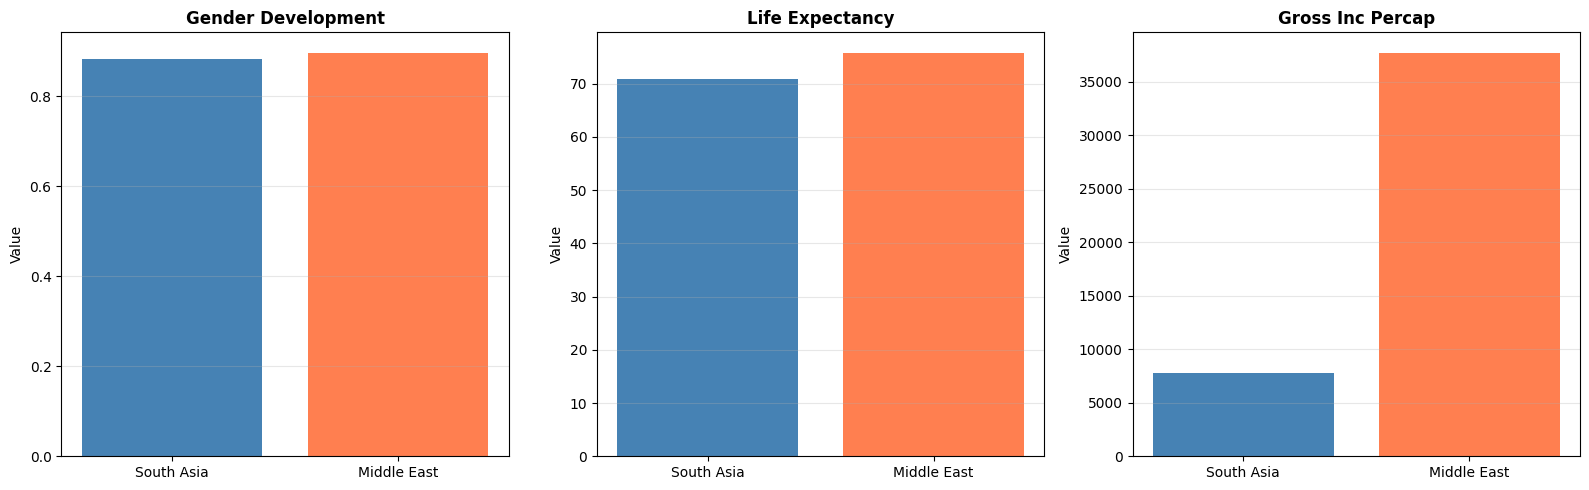

 Chart saved as 'metric_comparisons.png'

Greatest disparity: gross_inc_percap (difference: 29984.26)


In [76]:

# Calculate average metrics for each region
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sa_metrics = south_asia_df[metrics + ['country']].groupby('country').mean()
me_metrics = middle_east_df[metrics + ['country']].groupby('country').mean()

sa_metric_avg = sa_metrics.mean()
me_metric_avg = me_metrics.mean()

print("\nAverage Metrics - South Asia:")
print(sa_metric_avg)

print("\nAverage Metrics - Middle East:")
print(me_metric_avg)

# Create grouped bar chart
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, metric in enumerate(metrics):
    regions = ['South Asia', 'Middle East']
    values = [sa_metric_avg[metric], me_metric_avg[metric]]

    axes[idx].bar(regions, values, color=['steelblue', 'coral'])
    axes[idx].set_ylabel('Value')
    axes[idx].set_title(f'{metric.replace("_", " ").title()}', fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('metric_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved as 'metric_comparisons.png'")

# Identify greatest disparity
disparities = abs(sa_metric_avg - me_metric_avg)
max_disparity_metric = disparities.idxmax()
print(f"\nGreatest disparity: {max_disparity_metric} (difference: {disparities[max_disparity_metric]:.2f})")

*5. HDI Disparity:*

In [77]:

# Calculate range (max - min)
sa_range = south_asia_df['hdi'].max() - south_asia_df['hdi'].min()
me_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()

print(f"South Asia HDI Range: {sa_range:.4f}")
print(f"Middle East HDI Range: {me_range:.4f}")

# Calculate coefficient of variation (CV = std/mean)
sa_cv = south_asia_df['hdi'].std() / south_asia_df['hdi'].mean()
me_cv = middle_east_df['hdi'].std() / middle_east_df['hdi'].mean()

print(f"\nSouth Asia CV: {sa_cv:.4f}")
print(f"Middle East CV: {me_cv:.4f}")

# Determine which region has more variation
if sa_cv > me_cv:
    print(f"\nSouth Asia exhibits more variation in HDI")
else:
    print(f"\nMiddle East exhibits more variation in HDI")


South Asia HDI Range: 0.3210
Middle East HDI Range: 0.5130

South Asia CV: 0.1537
Middle East CV: 0.1791

Middle East exhibits more variation in HDI


*6. Correlation Analysis:*

South Asia Correlations with HDI:
  Gender Development Index: 0.8742
  Life Expectancy: 0.9388

Middle East Correlations with HDI:
  Gender Development Index: 0.9357
  Life Expectancy: 0.9331


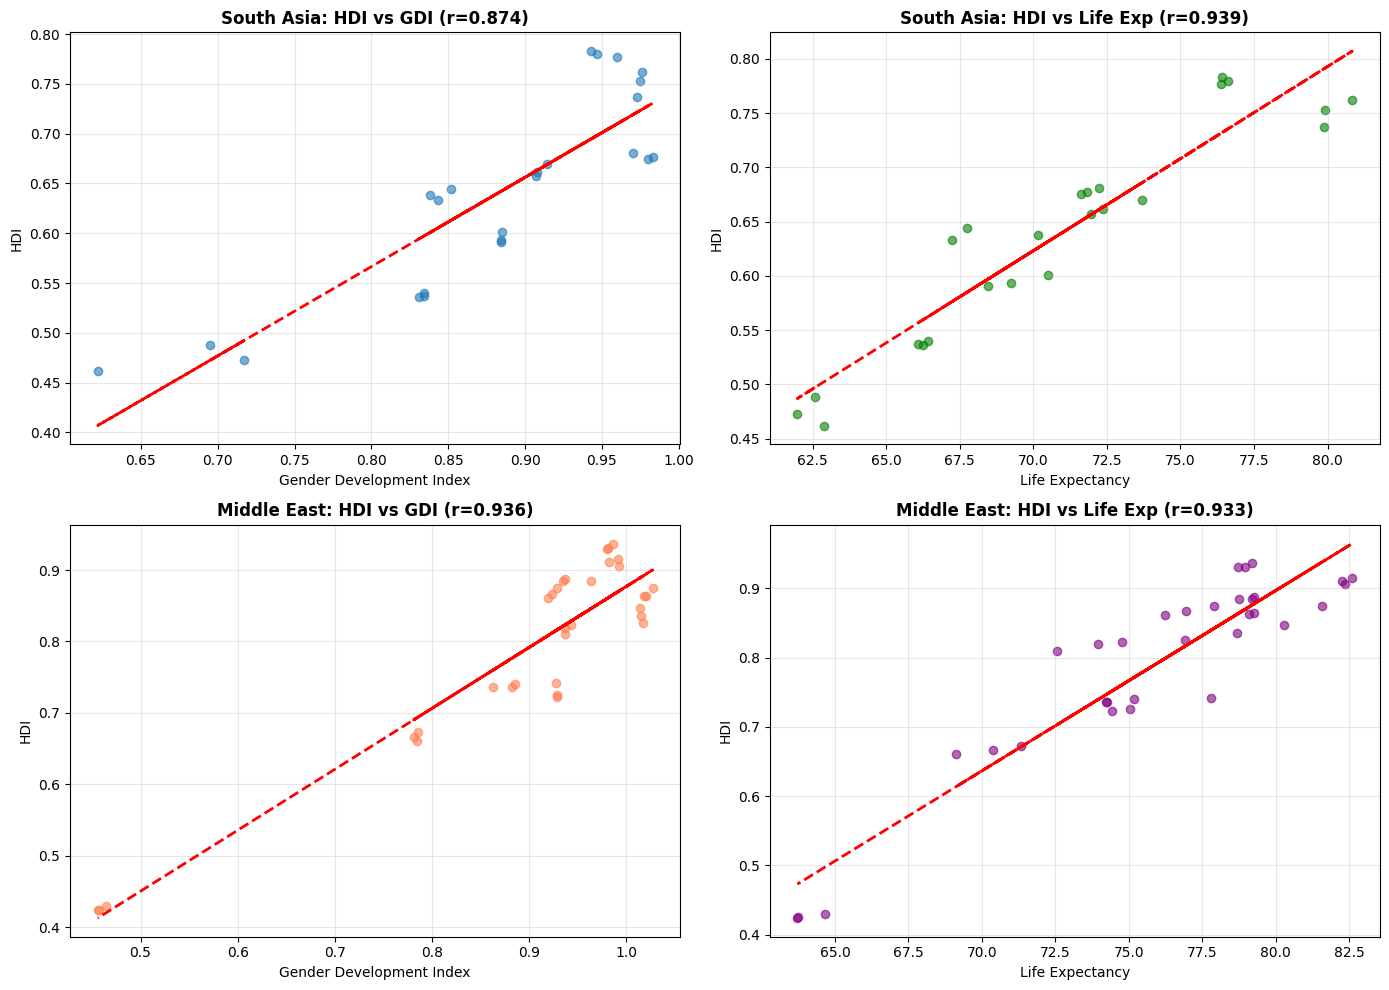

Chart saved as 'correlation_analysis.png'


In [78]:
# Correlations for South Asia
sa_clean = south_asia_df.dropna(subset=['hdi', 'gender_development', 'life_expectancy'])
sa_corr_gdi = sa_clean[['hdi', 'gender_development']].corr().iloc[0, 1]
sa_corr_le = sa_clean[['hdi', 'life_expectancy']].corr().iloc[0, 1]

print("South Asia Correlations with HDI:")
print(f"  Gender Development Index: {sa_corr_gdi:.4f}")
print(f"  Life Expectancy: {sa_corr_le:.4f}")

# Correlations for Middle East
me_clean = middle_east_df.dropna(subset=['hdi', 'gender_development', 'life_expectancy'])
me_corr_gdi = me_clean[['hdi', 'gender_development']].corr().iloc[0, 1]
me_corr_le = me_clean[['hdi', 'life_expectancy']].corr().iloc[0, 1]

print("\nMiddle East Correlations with HDI:")
print(f"  Gender Development Index: {me_corr_gdi:.4f}")
print(f"  Life Expectancy: {me_corr_le:.4f}")

# Create scatter plots with trendlines
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# South Asia - Gender Development
axes[0, 0].scatter(sa_clean['gender_development'], sa_clean['hdi'], alpha=0.6)
z = np.polyfit(sa_clean['gender_development'], sa_clean['hdi'], 1)
p = np.poly1d(z)
axes[0, 0].plot(sa_clean['gender_development'], p(sa_clean['gender_development']), "r--", linewidth=2)
axes[0, 0].set_xlabel('Gender Development Index')
axes[0, 0].set_ylabel('HDI')
axes[0, 0].set_title(f'South Asia: HDI vs GDI (r={sa_corr_gdi:.3f})', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# South Asia - Life Expectancy
axes[0, 1].scatter(sa_clean['life_expectancy'], sa_clean['hdi'], alpha=0.6, color='green')
z = np.polyfit(sa_clean['life_expectancy'], sa_clean['hdi'], 1)
p = np.poly1d(z)
axes[0, 1].plot(sa_clean['life_expectancy'], p(sa_clean['life_expectancy']), "r--", linewidth=2)
axes[0, 1].set_xlabel('Life Expectancy')
axes[0, 1].set_ylabel('HDI')
axes[0, 1].set_title(f'South Asia: HDI vs Life Exp (r={sa_corr_le:.3f})', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Middle East - Gender Development
axes[1, 0].scatter(me_clean['gender_development'], me_clean['hdi'], alpha=0.6, color='coral')
z = np.polyfit(me_clean['gender_development'], me_clean['hdi'], 1)
p = np.poly1d(z)
axes[1, 0].plot(me_clean['gender_development'], p(me_clean['gender_development']), "r--", linewidth=2)
axes[1, 0].set_xlabel('Gender Development Index')
axes[1, 0].set_ylabel('HDI')
axes[1, 0].set_title(f'Middle East: HDI vs GDI (r={me_corr_gdi:.3f})', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Middle East - Life Expectancy
axes[1, 1].scatter(me_clean['life_expectancy'], me_clean['hdi'], alpha=0.6, color='purple')
z = np.polyfit(me_clean['life_expectancy'], me_clean['hdi'], 1)
p = np.poly1d(z)
axes[1, 1].plot(me_clean['life_expectancy'], p(me_clean['life_expectancy']), "r--", linewidth=2)
axes[1, 1].set_xlabel('Life Expectancy')
axes[1, 1].set_ylabel('HDI')
axes[1, 1].set_title(f'Middle East: HDI vs Life Exp (r={me_corr_le:.3f})', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved as 'correlation_analysis.png'")


*7. Outlier Detection:*

South Asia outliers: 0
Middle East outliers: 3


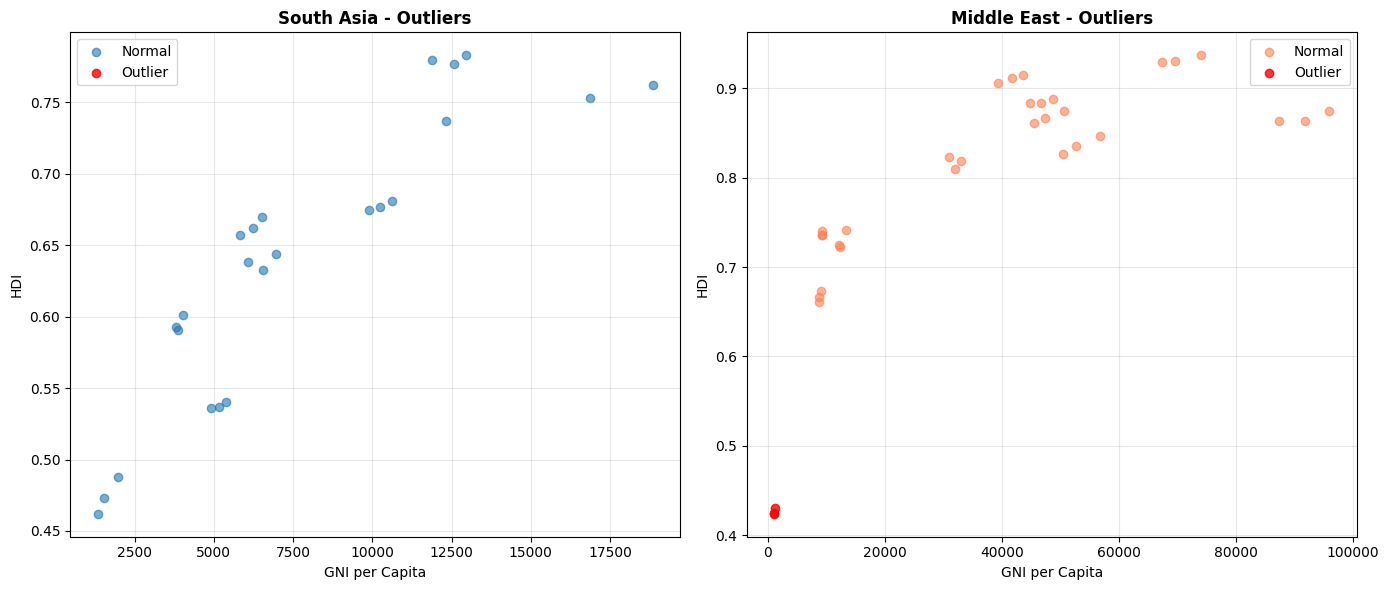

Chart saved as 'outlier_detection_regions.png'


In [79]:
# Outlier detection for South Asia
sa_outlier = south_asia_df.dropna(subset=['hdi', 'gross_inc_percap'])

q1_hdi_sa = sa_outlier['hdi'].quantile(0.25)
q3_hdi_sa = sa_outlier['hdi'].quantile(0.75)
iqr_hdi_sa = q3_hdi_sa - q1_hdi_sa
lower_hdi_sa = q1_hdi_sa - 1.5 * iqr_hdi_sa
upper_hdi_sa = q3_hdi_sa + 1.5 * iqr_hdi_sa

q1_gni_sa = sa_outlier['gross_inc_percap'].quantile(0.25)
q3_gni_sa = sa_outlier['gross_inc_percap'].quantile(0.75)
iqr_gni_sa = q3_gni_sa - q1_gni_sa
lower_gni_sa = q1_gni_sa - 1.5 * iqr_gni_sa
upper_gni_sa = q3_gni_sa + 1.5 * iqr_gni_sa

sa_outlier['is_outlier'] = ((sa_outlier['hdi'] < lower_hdi_sa) | (sa_outlier['hdi'] > upper_hdi_sa) |
                             (sa_outlier['gross_inc_percap'] < lower_gni_sa) | (sa_outlier['gross_inc_percap'] > upper_gni_sa))

print(f"South Asia outliers: {sa_outlier['is_outlier'].sum()}")

# Outlier detection for Middle East
me_outlier = middle_east_df.dropna(subset=['hdi', 'gross_inc_percap'])

q1_hdi_me = me_outlier['hdi'].quantile(0.25)
q3_hdi_me = me_outlier['hdi'].quantile(0.75)
iqr_hdi_me = q3_hdi_me - q1_hdi_me
lower_hdi_me = q1_hdi_me - 1.5 * iqr_hdi_me
upper_hdi_me = q3_hdi_me + 1.5 * iqr_hdi_me

q1_gni_me = me_outlier['gross_inc_percap'].quantile(0.25)
q3_gni_me = me_outlier['gross_inc_percap'].quantile(0.75)
iqr_gni_me = q3_gni_me - q1_gni_me
lower_gni_me = q1_gni_me - 1.5 * iqr_gni_me
upper_gni_me = q3_gni_me + 1.5 * iqr_gni_me

me_outlier['is_outlier'] = ((me_outlier['hdi'] < lower_hdi_me) | (me_outlier['hdi'] > upper_hdi_me) |
                             (me_outlier['gross_inc_percap'] < lower_gni_me) | (me_outlier['gross_inc_percap'] > upper_gni_me))

print(f"Middle East outliers: {me_outlier['is_outlier'].sum()}")

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# South Asia
sa_normal = sa_outlier[~sa_outlier['is_outlier']]
sa_out = sa_outlier[sa_outlier['is_outlier']]
axes[0].scatter(sa_normal['gross_inc_percap'], sa_normal['hdi'], alpha=0.6, label='Normal')
axes[0].scatter(sa_out['gross_inc_percap'], sa_out['hdi'], color='red', alpha=0.8, label='Outlier')
axes[0].set_xlabel('GNI per Capita')
axes[0].set_ylabel('HDI')
axes[0].set_title('South Asia - Outliers', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Middle East
me_normal = me_outlier[~me_outlier['is_outlier']]
me_out = me_outlier[me_outlier['is_outlier']]
axes[1].scatter(me_normal['gross_inc_percap'], me_normal['hdi'], alpha=0.6, label='Normal', color='coral')
axes[1].scatter(me_out['gross_inc_percap'], me_out['hdi'], color='red', alpha=0.8, label='Outlier')
axes[1].set_xlabel('GNI per Capita')
axes[1].set_ylabel('HDI')
axes[1].set_title('Middle East - Outliers', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_detection_regions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved as 'outlier_detection_regions.png'")